<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Laboratorio 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Gabriel Ortega</h3>
    <h3 align="center">Juan Pablo Jorquera; 201573533-6; Malla nueva</h3>
    <h3 align="center">David Medel; 201573548-4; Malla nueva</h3>
    <h3 align="center">Octubre 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

> <font size = "+2"><b>Antes de corregir se correrá su notebook utilizando la función Cell $\rightarrow$ Run All.</b> <br> <br>
Es posible que las simulaciones en este laboratorio se tarden un poco más en ejecutarse, sin embargo, mantenga un tope de 5 minutos.
</font>


## Instrucciones

La modalidad de trabajo será mediante el uso de jupyter notebook. El notebook debe ser desarrollado en parejas o individual y ser entregado el 15 de octubre de 2019.

La **modalidad de entrega será un archivo Apellido1_Apellido2_Lab2.zip** que contenga un notebook que incluya todas las preguntas con sus respectivas respuestas, un README que indique la forma correcta de ejecutar su notebook y cualquier archivo/carpeta extra que considere necesario para el correcto funcionamiento de su tarea (no es necesario adjuntar los .csv que se utilicen para trabajar). El laboratorio puede ser trabajado tanto en lenguaje R como en python 3 (para los que usen python 2.X, absténganse a las consecuencias). Lea bien el enunciado.


**Cualquier copia detectada implicará nota 0 en el laboratorio correspondiente y se notificará la situación al profesor.**




## 1. La paradoja del cumpleaños

La paradoja del cumpleaños es un problema matemático cuya respuesta es sorprendente dado el contexto del problema. En esta sección usted trabajará con este problema y podrá encontrar la respuesta que sorprendió a muchos. La paradoja es la siguiente: $N$ personas se reunen casualmente ¿Cuál es la probabilidad de que al menos 2 de ellas estén de cumpleaños el mismo día? **Considere año normal de 365 días.**

> a) Plantee la obtención de esta probabilidad en función de N. *Hint:* $\frac{Casos\;favorables}{Casos\;posibles}$


In [1]:
def paradoja_prob(n):
    casos_pos = 365
    p = 1.0
    for i in range(1, n+1):
        casos_fav = 366 - i
        p = p * casos_fav / casos_pos
    return (1-p)
    
#Ejemplo
print ('Probabilidad paradoja cumpleaños')
print ('Para n= 23. La probabilidad es de '+ str(paradoja_prob(23)))


Probabilidad paradoja cumpleaños
Para n= 23. La probabilidad es de 0.5072972343239855


> b) Simule la paradoja del cumpleaños con varios $N \in [2,365]$ y obtenga la probabilidad empírica de encontrar dos personas con el mismo cumpleaños. Luego haga un gráfico de estas probabilidades en función de $N$ y la fórmula obtenida en a) y compare. 

*Tip: Como el orden de ejecución es $N\cdot Simulaciones$ no es necesario que vaya de 1 en 1 con los $N$ puede ir de 3 en 3, 5 en 5, etc.*

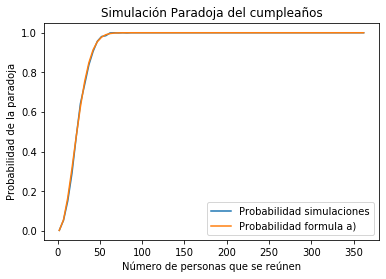

In [28]:
import matplotlib.pyplot as plt
import random
random.seed(1000) 

#creamos paradoja(n), recibe un N perteneciente al intervalo 
def paradoja(n):
    cumpleanos = []
    #agregamos todos los dias del año, posibles cumpleaños
    for i in range(0,n):
        cumpleanos.append(random.randint(0,366))
    #se busca coincidencia de cumpleaños
    for i in range(0,n):
        for x in range(0,n):
            if(cumpleanos[i] == cumpleanos[x] and i!=x):
                return True
    return False

#La funcion prob(n,k) calcula la probabilidad al realizar k iteraciones en un universo de n personas
def prob(n,k):
    c_favorables=0
    casos_totales=0
    #buscamos los casos favorables y no favorables
    for i in range(0,k):
        if paradoja(n) == True:
            c_favorables+=1
            casos_totales+=1
        else:
            casos_totales+=1
    prob= c_favorables/casos_totales
    return prob
        
#Se simulara para varios N
simulaciones=[] #lista para guardar valores de n
probs=[] #lista para guardar probabilidades de cada n de la simulación

prob_a=[] #lista probabilidades con la formula de inciso a

#simulamos
for i in range (2,366,5): #de 5 en 5
    simulaciones.append(i)
    probs.append(prob(i,1000)) #k replicas por simulacion, k=1000 se demora un poco, pero imprime un grafico mas correcto
    prob_a.append(paradoja_prob(i))
    
#Imprimimos el grafico con las curvas representativas
plt.ion() 
plt.plot(simulaciones,probs,label="Probabilidad simulaciones" )
plt.plot(simulaciones,prob_a, label="Probabilidad formula a)")
plt.xlabel('Número de personas que se reúnen')
plt.ylabel('Probabilidad de la paradoja')
plt.title("Simulación Paradoja del cumpleaños")
plt.legend()



El gráfico recién expuesto nos muestra la representación de las probabilidades para distintos $N$. Tal como lo describe la leyenda del gráfico la curva azul nos enseña el comportamiento de las probabilidades según el método de simulación, mientras que la curva de color anaranjado el comportamiento de las probabilidades según la formula expuesta en el inciso a).

La curva de color azul, presenta una similitud cada vez más cerca a la de color anaranjado mientras más grande es el valor de $k$, donde $k$ corresponde a la cantidad de replicas por simulación para cada $N$.

En caso opuesto , si este valor disminuye se puede observar cómo la curva azul presenta quiebres dentro de su recorrido esperado.

>c) Mediante simulación obtenga la cantidad de personas necesarias que debe asistir a la reunión para que la probabilidad de que al menos 2 personas estén de cumpleaños sea: 50%, 70% y 95%. Luego, para cada cantidad encontrada compare el valor de su probabilidad teórica mediante la fórmula que encontró en a). 

¿A qué se debe que al encontrar un valor empírico y evaluarlo en la fórmula de a) se observe un valor diferente que el encontrado? Si esto no le sucedió en su simulación, responda poniéndose en la siguiente situación:

- Su simulación le arrojó que 30 es el 50%
- F(30) es 0.45, claramente no llega al 50% (de ejemplo solamente)



¿A qué se debe ese error?

In [3]:
#buscamos probabiliades 50%, 70% y 95% en la lista de probabilidades
l50=[]
l70=[]
l95=[]

for x in probs:
    if x >= 0.5 and x<0.7:
        l50.append(probs.index(x))
    if x >=0.7 and x<0.95:
        l70.append(probs.index(x))
    if x >= 0.95:
        l95.append(probs.index(x))
        
#tomamos el primer valor de la lista correspondiente al primero que encontró        
p50 = simulaciones[l50[0]]
p70 = simulaciones[l70[0]]
p95 = simulaciones[l95[0]]

print("Probabilidad Teórica")
print("Para que la probabilidad sea de al menos 50%, N debe valer "+ str(p50))
print("Para que la probabilidad sea de al menos 70%, N debe valer "+ str(p70))
print("Para que la probabilidad sea de al menos 95%, N debe valer "+ str(p95)+"\n")
print("Probabilidad con fórmula")
print("Con N= "+str(p50)+ " la probabilidad es: "+ str(paradoja_prob(p50)*100)+"%")
print("Con N= "+str(p70)+ " la probabilidad es: "+ str(paradoja_prob(p70)*100)+"%")
print("Con N= "+str(p95)+ " la probabilidad es: "+ str(paradoja_prob(p95)*100)+"%")


Probabilidad Teórica
Para que la probabilidad sea de al menos 50%, N debe valer 27
Para que la probabilidad sea de al menos 70%, N debe valer 32
Para que la probabilidad sea de al menos 95%, N debe valer 47

Probabilidad con fórmula
Con N= 27 la probabilidad es: 62.68592822632421%
Con N= 32 la probabilidad es: 75.33475278503207%
Con N= 47 la probabilidad es: 95.47744028332993%


El error se debe a que la simulación se esta realizando con un $N\in [2,365]$ pero de 5 en 5, por lo cual pueden haber valores de $N$ que no evalúa, también otra causa es que depende de la cantidad de veces que se realice la simulación por cada $N$, mientras mayor sea este valor más representativa será la probabilidad. No debemos olvidar que las simulaciones utilizan la función $\textit{random.randint()}$, una función que devuelve un valor aleatorio, los cuales pueden variar en las distintas simulaciones, para esto se utilizó una semilla para la replicación de dichos valores.
 



>d) Si ahora nos interesa cuando 3, 4, 5 y 6 personas están de cumpleaños el mismo día. Realice un gráfico similar al del inciso b) pero esta vez con $P_{i}$ en función de $N$ donde $i \in [2,6]$ Concluya respecto al comportamiento de las gráficas.

La fórmula para calcular la probabilidad $P_i$ de que $i$ personas estén de cumpleaños el mismo día, se dedujo de la siguiente manera:

- $P(Al\;menos\;2)$ = $P(exactamente\;2)$ + $P(exactamente\;3)$  + $\cdot \cdot \cdot$ +  $P(exactamente\;n)$
- $P(Al\;menos\;3)$ = $P(exactamente\;3)$ + $P(exactamente\;4)$  + $\cdot \cdot \cdot$ +  $P(exactamente\;n)$
- $P(Al\;menos\;3) = P(Al\;menos\;2) - P(exactamente\;2)  $

Lo cual para $k$ personas queda representado como:
- $P(Al\;menos\;k) = P(Al\;menos\;(k-1)) - P(exactamente\;(k-1))  $

**Obs:** Notar que se puede representar recursivamente donde la base seria cuando $k=2$, es decir, nuestra primera función utilizada en las preguntas anteriores.

Y la probabilidad para exactamente $k$ personas estén de cumpleaños el mismo día en un universo de $n$ personas, se define como:

- $P(exactamente \;k)=  \frac{365!}{365^n (365-n+1)!}$ $n \choose k$


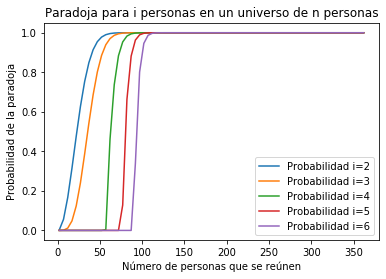

In [4]:
import math as m

def combinatoria(n,p):
    return (m.factorial(n)//(m.factorial(p)*m.factorial(n-p)))

#funcion para el calculo de P(exactamente k): exactamente k personas cumplen año el mismo día.
def exactamente_k(n,k):
    num = m.factorial(365)
    res = 365-n+1
    den = (365**n)*(m.factorial(res))
    resultado = (num/den)*combinatoria(n,k)
    return resultado

#funcion recursiva como se explica anteriormente
def prob_almenosk(n,k):
    if k == 2:
        return paradoja_prob(n)
    return prob_almenosk(n,k-1)-exactamente_k(n,k-1)

#creamos listas para almacenar las probabilidades para cada i.
prob_3 = []
prob_4 = []
prob_5 = []
prob_6 = []

#Se realiza para cada N, en 5 en 5
#Probabilidades negativas, casos improbables, se guardan como 0, para la representación gráfica.

#k =3
for i in range (2,366,5):
    if (i<2 or prob_almenosk(i,3)<0):
        prob_3.append(0)
    else:
        prob_3.append(prob_almenosk(i,3))
#k=4        
for i in range (2,366,5):
    if (i<3 or prob_almenosk(i,4)<0):
        prob_4.append(0)
    else:
        prob_4.append(prob_almenosk(i,4))
#k=5
for i in range (2,366,5):
    if (i<4 or prob_almenosk(i,5)<0):
        prob_5.append(0)
    else:
        prob_5.append(prob_almenosk(i,5))
#k=6       
for i in range (2,366,5):
    if (i<5 or prob_almenosk(i,6)<0):
        prob_6.append(0)
    else:
        prob_6.append(prob_almenosk(i,6))

plt.ion() 
#para la probabilidad de i=2, se utilizá la formula de a).
plt.plot(simulaciones,prob_a,label="Probabilidad i=2")
plt.plot(simulaciones,prob_3,label="Probabilidad i=3")
plt.plot(simulaciones,prob_4,label="Probabilidad i=4")
plt.plot(simulaciones,prob_5,label="Probabilidad i=5")
plt.plot(simulaciones,prob_6,label="Probabilidad i=6")
plt.xlabel('Número de personas que se reúnen')
plt.ylabel('Probabilidad de la paradoja')
plt.title("Paradoja para i personas en un universo de n personas")
plt.legend()


    
    

Cabe destacar que las probabilidades presentadas están descritas para que al menos $i$ personas estén de cumpleaños el mismo.Las gráficas tienen un comportamiento similar para cuando aumenta el valor de $i$ se necesita cada vez un valor más grande de $N$.

>e) Debido a una falla espacio-temporal usted ha sido re-ubicado a otra dimensión donde los años tienen 1000 días. Necesita comprar algo para comer y no morir de hambre mientras los científicos de dicho universo lo intentan enviar de vuelta a casa. Usted ha decidido apostar con una persona con la base de la paradoja del cumpleaños. ¿Cuántas personas debería haber en la junta para tener al menos una certeza del 90% de que ganará la apuesta?

In [5]:
#Todos los cumpleaños están en el rango [1,1000]

#formula similar a la de a), donde los casos posibles ahora son 1000.
def paradoja_prob2(n):
    casos_pos = 1000
    p = 1.0
    for i in range(1, n+1):
        casos_fav = 1001 - i
        p = p * casos_fav / casos_pos
    return (1-p)

#buscamos la probabilidad de 90%
c_mil = []
for i in range(2,366):
    c_mil.append(paradoja_prob2(i))    
for x in c_mil:
    if x >= 0.9:
        print ("Deben haber al menos "+ str(c_mil.index(x))+ " personas. Con probabilidad de "+ str(x))
        break


Deben haber al menos 66 personas. Con probabilidad de 0.9028071493869662


>f) ¿Cuál es la probilidad de que una persona tenga el mismo cumpleaños que usted? (365 días)

La probabilidad de que en una reunión de $n$ personas alguien tenga mi cumpleaños es de: $1-\left({\frac  {364}{365}}\right)^{n}$.

Text(0.5, 1.0, 'Probabilidad que una persona tenga mi mismo cumpleaños')

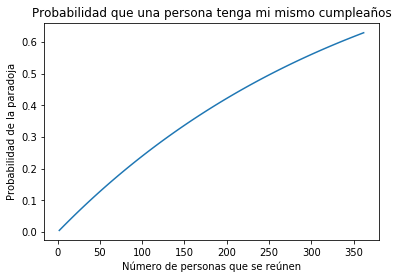

In [6]:
def mi_cumple(n):
    return 1- (364/365)**n
mp=[]

for i in range (2,366,5):
    mp.append(mi_cumple(i))
    
plt.ion() 
plt.plot(simulaciones,mp) 
plt.xlabel('Número de personas que se reúnen')
plt.ylabel('Probabilidad de la paradoja')
plt.title("Probabilidad que una persona tenga mi mismo cumpleaños")



Según el gráfico presentado se necesitaría al menos una $n$ de 253 para dar un valor superior a 0,5. Lo que nos indica que es un hecho muy improbable.

## 2. Redes Complejas



El tema de Redes Complejas (grafos con muchos nodos) ha estado creciendo últimamente, sus orígenes se remontan a fines de los 90. Una de las propuestas para modelar la construcción de estas redes es la siguiente:

1. Se inicia con un solo nodo 
2. En cada iteración se agrega un nuevo nodo.
3. La probabilidad de unirse a un nodo viene dado por la siguiente expresión: $ P(Unirse\,al\,nodo_i) = \frac{Grado\,Nodo_i}{Grado\,Total\,Grafo}$ donde el Grado Total del Grafo corresponde a la suma de los grados de cada nodo perteneciente a este.
4. Se repite (2) y (3) varias veces hasta tener una red bastante grande.

A este tipo de red se les conoce como "Scale Free".

Un listado de links para refrescar conceptos: 

* [Grafo](https://es.wikipedia.org/wiki/Grafo)
* [Grado de un nodo](https://es.wikipedia.org/wiki/Grado_(teor%C3%ADa_de_grafos))


>a) Simule grafos de: 100, 1000 y 5000 nodos de la forma indicada y haga un scatterplot de Cantidad de Nodos v/s Grado del Nodo para los 3 grafos.

* Recuerde que las probabilidades se modifican después de agregar un nodo.
* Puede hacer una única iteración de 5000 pasos y guardar el estado de la red en 1000, 5000 y 10000.
* La matriz de adyacencia le facilitará el trabajo de obtener el grado de cada nodo (no es necesario hacerla, pero si tiene problemas encontrando alguna estructura de datos, esta le puede servir).

Matriz de Adyacencia:

Es una matriz cuadrada de $NxN$ donde en la posición $i,j$ hay un 1 si entre los nodos $i$ y $j$ hay una arista, de lo contrario esa entrada es 0. La diagonal en este casó será de 0 solamente.




Text(0.5, 1.0, 'Red compleja con 10000 nodos')

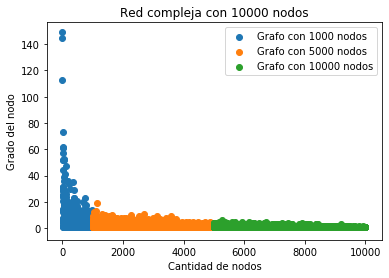

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1000)

%matplotlib inline

#Función para elegir al nodo que se unirá el i-esimo nodo de la iteración
#Se utilizá función random.choice para la selección según la probabilidad
def elegir_nodo(d):
    nodos = []
    prob = []
    grado_total = sum(d.values())
    for k,v in d.items():
        nodos.append(k)
        prob.append(v/grado_total)
    return np.random.choice(nodos, 1, p=prob)[0]


def grafo(n):
    #Se crea un grafo vacio
    G=nx.Graph()

    #Primeros dos nodos iniciales deben si o si estar conectados
    G.add_node(0)
    G.add_node(1)
    G.add_edge(0,1)
    
    g_mil={}
    g_cinco={}
    g_diez={}
    
    #agrego n nodos
    for i in range(2,n):
        d=dict(G.degree)
        #obtener el nodo a agregar
        nodo = elegir_nodo(d)
        G.add_node(i)
        #se crea el arco entre el nodo i que se ingresa y el nodo seleccionado 
        G.add_edge(i,nodo)
        
    #devolvemos diccionario, key= nodo, value= grado
    f=dict(G.degree)
    return G
            
    #nx.draw(G)
    #plt.show()

#Simulamos para 10.000 y almacenamos información de 1000, 5000 y 10000

f=dict((grafo(10000)).degree)

#1000 iteraciones
nodos_m = []
grados_m = []
#5000 iteraciones
nodos_c = []
grados_c = []
#10000 iteraciones
nodos_d = []
grados_d = []

for k,v in f.items():
    if k<1000:
        nodos_m.append(k)
        grados_m.append(v)
    elif k>=1000 and k<5000:
        nodos_c.append(k)
        grados_c.append(v)
    else:
        nodos_d.append(k)
        grados_d.append(v)
        
#creamos gráfico representativo  
plt.ion()
plt.scatter(nodos_m, grados_m,label="Grafo con 1000 nodos")
plt.scatter(nodos_c, grados_c,label="Grafo con 5000 nodos")
plt.scatter(nodos_d, grados_d,label="Grafo con 10000 nodos")
plt.xlabel('Cantidad de nodos')
plt.ylabel('Grado del nodo')
plt.legend()

plt.title("Red compleja con 10000 nodos")
#tiempo promedio ejecución: 1,25 min 

>b) Observando los gráficos realizados en a) ¿Qué puede decirse acerca de la distribución de grado?

**Respuesta:**
Se puede notar la particularidad de que la distribución de grado se encuentra en torno a los primeros nodos en agregarse, siendo estos primeros nodos los que poseen más conexiones que el resto. El modelo presentado sigue un patrón, en el que pocos nodos están altamente conectados. Ello implica que la totalidad del grafo esta parcializada en muy pocos nodos, mientras que el resto tal como se observa en el gráfico, casi no supera las 20 conexiones.

**Ejemplo ilustrativo**: Si tomamos un grafo con una menor cantidad de nodos lo podemos representar y observar cómo los nodos con mayor conexión son los iniciales.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


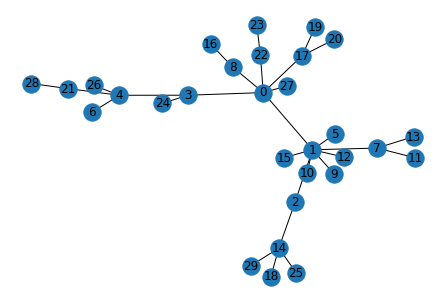

In [8]:
np.random.seed(1000)
#n = 30
G= grafo(30)
nx.draw(G, with_labels=True)
plt.show()

>c) Si se quitan aristas con una probabilidad $\rho$ ¿Cómo cambia la distribución de grado del grafo de 10000 nodos? Genere gráficos de Cantidad de Nodos v/s Grado del Nodo para distintos valores de $\rho$ para ayudarle en su respuesta. ¿Sigue siendo de libre escala, pierde forma definida o se asemeja a otra distribución?


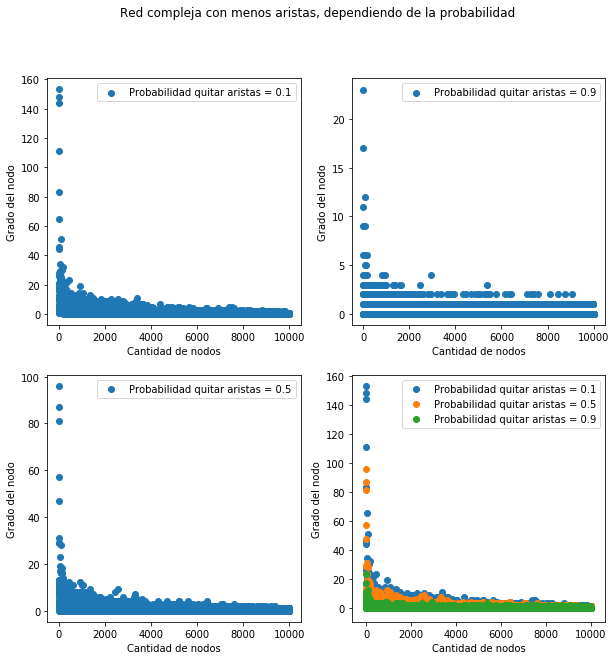

In [9]:
#la funcion devuelve True si se elimina el nodo o no, respecto a la probabilidad p
#p es la probabilidad de que si se elimine el nodo
def eliminar(p):
    opciones = [True, False]
    prob = [p, 1-p]
    return np.random.choice(opciones, 1, p=prob)[0]

#creamos un grafo de 10000 nodos, lo copiamos para probar la probabilidad
G0=grafo(10000)
G1 = G0.copy()
G2 = G0.copy()

#probabilidad = 0.1
p0=0.1
#lista con los arcos del grafo
edge_g0 = set(G0.edges())
for i in edge_g0:
    if eliminar(p0) ==True:
        G0.remove_edge(*i)

#probabilidad = 0.5
p0=0.5
edge_g1 = set(G1.edges())
for i in edge_g1:
    if eliminar(p0) ==True:
        G1.remove_edge(*i)

#probabilidad = 0.9
p0=0.9
edge_g2 = set(G2.edges())
for i in edge_g2:
    if eliminar(p0) ==True:
        G2.remove_edge(*i)

a=dict(G0.degree)
b=dict(G1.degree)
c=dict(G2.degree)

#p=0.1
nodos_a = []
grados_a = []
#p=0.5
nodos_b = []
grados_b = []
#p=0.9
nodos_c = []
grados_c = []

#guardamos la información del grafo en listas para nodos y grados
for k,v in a.items():
    nodos_a.append(k)
    grados_a.append(v)
    
for k,v in b.items():
    nodos_b.append(k)
    grados_b.append(v)
    
for k,v in c.items():
    nodos_c.append(k)
    grados_c.append(v)
    

#gráficos

fig, axs = plt.subplots(2,2, figsize=(10, 10))
fig.suptitle("Red compleja con menos aristas, dependiendo de la probabilidad")
axs[0, 0].scatter(nodos_a, grados_a,label="Probabilidad quitar aristas = 0.1")
axs[1, 0].scatter(nodos_b, grados_b,label="Probabilidad quitar aristas = 0.5")
axs[0, 1].scatter(nodos_c, grados_c,label="Probabilidad quitar aristas = 0.9")
axs[0, 0].legend()
axs[1, 0].legend()
axs[0, 1].legend()
for ax in axs.flat:
    ax.set(xlabel='Cantidad de nodos', ylabel='Grado del nodo')





plt.ion()
plt.scatter(nodos_a, grados_a,label="Probabilidad quitar aristas = 0.1")
plt.scatter(nodos_b, grados_b,label="Probabilidad quitar aristas = 0.5")
plt.scatter(nodos_c, grados_c,label="Probabilidad quitar aristas = 0.9")
plt.xlabel('Cantidad de nodos')
plt.ylabel('Grado del nodo')
plt.legend()

#tiempo de ejecución promedio: 50seg     


**Respuesta:**
Tal como se expone en los gráficos presentados la forma definida sigue similar a las expuestas en las preguntas anteriores, esta toma una forma de distribución normal logarítmica, la cual es libre de escala.


## 3. Artistas Musicales

En esta sección usted cuenta con dos datasets "albums.csv" y "artists.csv", el primero cuenta con información de álbums musicales lanzados por diversos artistas como el número de ventas, el estilo musical, puntajes según distintos críticos, etc. El segundo contiene datos sobre diversos artistas, como su nombre, puesto en la banda, pais de origen, etc. 

Para información más detallada de los datasets [aquí](https://www.kaggle.com/revilrosa/music-label-dataset#artists.csv)

>a) Cargue ambos dataset, cuente la cantidad de celdas nulas por columna en c/u y limpielas si cree necesario. 

In [10]:
import pandas as pd
import numpy as np

# Leer archivos
albums = pd.read_csv('albums.csv', index_col = 'id')
artists = pd.read_csv('artists.csv', index_col = 'id')
# Visualizar estructura
print('Álbumes')
display(albums.head())
print('Artistas')
display(artists.head())
# Ver tipo de datos
print('\nTipos de datos\n')
print(albums.dtypes)
print(artists.dtypes)
# Ver columnas con entradas nulas
print('\nColumnas nulas \n')
print(albums.isnull().sum())
print(artists.isnull().sum())
# Eliminar columnas irrelevantes
artists.drop(['email', 'zip_code'], axis=1, inplace=True)

Álbumes


,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
id,,,,,,,,,
1,1767,Call me Cat Moneyless That Doggies,Folk,2006,11,905193,4.0,1.5,3.0
2,23548,Down Mare,Metal,2014,7,969122,3.0,4.0,5.0
3,17822,Embarrassed Hungry,Latino,2000,11,522095,2.5,1.0,2.0
4,19565,Standard Immediate Engineer Slovakia,Pop,2017,4,610116,1.5,2.0,4.0
5,24941,Decent Distance Georgian,Black Metal,2010,8,151111,4.5,2.5,1.0


Artistas


,real_name,art_name,role,year_of_birth,country,city,email,zip_code
id,,,,,,,,
1,Kameko Nelson,NaN,female voice,1981,Slovenia,Vedrin,lorem.tristique.aliquet@nonummyFusce.co.uk,6914
2,Sacha Cameron,Bianco Ibureno Chloride,artist,1955,Guernsey,Montigny-le-Tilleul,Sed@elementum.com,0568
3,Thane E. Oliver,NaN,rapper,1993,Guinea-Bissau,Saint-Sébastien-sur-Loire,Integer.tincidunt.aliquam@libero.com,813154
4,Cole E. Joseph,Persian responsible,bassist,1994,Estonia,Newquay,nulla.magna.malesuada@vulputate.com,A4S 2B3
5,Sonia U. Jensen,Asleep lonely Big Morgan,DJ,1988,Vanuatu,Dudzele,faucibus@euismodetcommodo.edu,46418



Tipos de datos

artist_id                 int64
album_title              object
genre                    object
year_of_pub               int64
num_of_tracks             int64
num_of_sales              int64
rolling_stone_critic    float64
mtv_critic              float64
music_maniac_critic     float64
dtype: object
real_name        object
art_name         object
role             object
year_of_birth     int64
country          object
city             object
email            object
zip_code         object
dtype: object

Columnas nulas 

artist_id               0
album_title             0
genre                   0
year_of_pub             0
num_of_tracks           0
num_of_sales            0
rolling_stone_critic    0
mtv_critic              0
music_maniac_critic     0
dtype: int64
real_name            0
art_name         16709
role                 0
year_of_birth        0
country              0
city                 0
email                0
zip_code             0
dtype: int64


Visualizando la estructura general, no se encuentran mayores problemas. La única columna que se encontraron valores nulos fue en art_name de artistas, pero dichos valores sol válidos al no ser obligatorio un nombre artístico para cada artista, por lo que se decidió mantenerlos como nulos. También, se verificó que los tipos de datos fueran los adecuados para poder trabajarlos y se eliminó columnas que se consideraron irrelevantes para el estudio como zip_code o email.

>b) Responda las siguientes preguntas utilizando recursos visuales (tablas, gráficos). 

* Haga un top 10 de los mejores álbumes para cada crítico
* En función del puntaje promedio, ordene los géneros musicales de mejor ranking a peor.
* Top 5 de países con álbumes mejor calificados.
* Top 10 de artistas con más albumes publicados.
* ¿Qué generos predominan en los artistas Chilenos?
* Separando a los artistas en los que nacieron antes de 1980 y de 1980 en adelante. Si consideramos los años 2005, 2010, 2015 y 2019 ¿cómo han ido evolucionando los puntajes promedio de ambos grupos con el paso del tiempo? ¿Es posible evidenciar alguna tendencia?
* Haga una línea del tiempo donde en cada año se indique los 3 géneros con más álbumes publicados* ¿Se evidencia alguna tendencia? Haga la misma línea de tiempo para algún páis en específico de su elección y compare, si en algún año no hubo publicación deje la casilla marcada con "-".

Para la línea del tiempo se sugiere un formato como el siguiente: 

| 2000 | 2001 | 2002 | 2003 | 2004 |
|------|------|------|------|------|
| 1°   | 1°   | 1°   | 1°   | 1°   |
| 2°   | 2°   | 2°   | 2°   | 2°   |
| 3°   | 3°   | 3°   | -   | 3°   |

* ¿Hay alguna diferencia en los géneros que artistas Chilenos, Argentinos, Peruanos y Bolivianos publicaban?

In [11]:
# Top 10 para cada crítico
print("Mejores álbumes según rolling stone")
albums.sort_values('rolling_stone_critic', ascending = False).head(10)

Mejores álbumes según rolling stone


,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
id,,,,,,,,,
42778,43000,Engineer Minangkabau,Pop,2016,3,538451,5.0,0.5,2.0
84759,25773,Charming Jordan,Indie,2010,5,686049,5.0,2.5,2.0
17597,28588,Ice Better have,Indie,2007,11,20691,5.0,3.0,2.0
26735,1997,American Boy Unfair The Asleep,Indie,2018,6,315246,5.0,0.5,3.0
84749,5259,My Best Chemist Hungry,J-Rock,2017,11,82543,5.0,5.0,4.5
52970,2476,Kittens in My Heart Bulls In My Garden,Western,2011,3,380985,5.0,3.0,3.5
31584,33260,Under the Fiat Of Love Find,Latino,2008,6,569374,5.0,5.0,0.5
44339,23423,Steel Fierce Kia Hills,Compilation,2010,11,355788,5.0,5.0,4.5
26738,19142,Bertie,Heavy Metal,2004,12,840608,5.0,1.0,1.5


In [12]:
print("Mejores álbumes según MTV")
albums.sort_values('mtv_critic', ascending = False).head(10)

Mejores álbumes según MTV


,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
id,,,,,,,,,
26108,27458,Aggressive Tomorrow In the Sky,Electro-Pop,2003,11,702114,0.5,5.0,1.5
24131,43422,Support Available Slovak My The,Pop-Rock,2013,4,757578,0.5,5.0,4.5
57800,2199,Finnish,Brit-Pop,2007,14,162003,4.5,5.0,1.0
83701,27098,Singapore,Deep House,2002,12,591984,2.5,5.0,3.5
9331,6544,Elk Search Realistic Unfortunate Turkmenistan,Folk,2017,4,762541,1.0,5.0,4.5
57803,34792,Salads Unfortunate Medical,Latino,2008,10,920971,2.5,5.0,2.0
57818,48528,OCamel Suspend Pony,Blues,2003,6,723153,2.5,5.0,3.0
57822,14021,Sorry Public Relations Specialist Pasta Rock,Alternative,2012,2,51379,3.5,5.0,4.5
83694,2057,Farmer Lonely Jinyu,Gospel,2000,4,511977,1.0,5.0,2.5


In [13]:
print("Mejores álbumes según Music Maniac")
albums.sort_values('music_maniac_critic', ascending = False).head(10)

Mejores álbumes según Music Maniac


,artist_id,album_title,genre,year_of_pub,num_of_tracks,num_of_sales,rolling_stone_critic,mtv_critic,music_maniac_critic
id,,,,,,,,,
28832,23810,Alpaca DJ Mix Running Around Like a Jewel In t...,Retro,2016,10,776947,4.0,3.5,5.0
91689,19415,Summer In the Sky Bangla,Deep House,2016,9,573913,3.0,2.0,5.0
77038,15664,Tutti i Frutti Are You My Morgan Sheet,Parody,2018,3,19252,2.5,4.0,5.0
81377,22485,Beer Don't Talk to Stew,Country,2004,14,783677,2.0,4.5,5.0
15656,27239,Don't Talk to Additional Aggressive,K-Pop,2015,7,125304,4.0,3.5,5.0
12068,9871,Shame Dolls,Indietronica,2018,14,829989,2.5,3.0,5.0
28833,9459,Computer Systems,Pop,2017,11,565673,1.5,1.0,5.0
31939,32372,Alan,Blues,2003,9,221411,0.5,2.5,5.0
19287,2308,History,Rock,2019,5,901567,2.5,3.0,5.0


Nótese que para los tres casos sucedió que habían más de diez álbumes con nota perfecta (para el crítico correspondiente), por lo que se seleccionaron los diez mejores arbitrariamente de aquellos con nota perfecta.

In [14]:
# Punaje promedio por género
print('Mejores géneros')
# Crear ranking promedio
albums_ranked = albums.copy()
albums_ranked['puntaje_promedio'] = (albums_ranked['rolling_stone_critic']+albums_ranked['mtv_critic']+albums_ranked['music_maniac_critic'])/3
albums_ranked.drop(['rolling_stone_critic', 'mtv_critic', 'music_maniac_critic'], axis=1, inplace=True)
# Organizar por género
albums_ranked_by_genre = albums_ranked.groupby('genre').mean().sort_values('puntaje_promedio', ascending=False).copy()
albums_ranked_by_genre.head(10)

Mejores géneros


,artist_id,year_of_pub,num_of_tracks,num_of_sales,puntaje_promedio
genre,,,,,
Indietronica,25458.421959,2009.410118,8.425188,489309.658235,2.794133
Deep House,25229.185437,2009.299633,8.616553,495794.034049,2.791514
Live,24682.742782,2009.677690,8.513911,481662.770079,2.784077
Holy Metal,24667.206670,2009.543709,8.374432,501146.840323,2.783308
Jazz,25386.832911,2009.352405,8.464304,491715.788861,2.769451
Country,25786.888610,2009.411942,8.515304,490172.293026,2.768941
Blues,24798.439834,2009.546162,8.532676,494870.504668,2.766943
Hard Rock,24795.155810,2009.720688,8.459093,506168.350703,2.766719
Pop-Rock,25133.766237,2009.429897,8.416237,499742.905670,2.765292


Aquí se muestra una selección del top 10 de géneros considerando para el ranking un promedio de todos los críticos para cada álbum (rolling stone, mtv y music maniac).

In [15]:
# top 5 países con álbumes mejor calificados
print('Top 5 países con mejores álbumes')
artists_albums = pd.merge(artists, albums_ranked, left_on='id', right_on='artist_id')
artists_albums_ranked_by_country = artists_albums.groupby('country').mean().sort_values(
    'puntaje_promedio', ascending=False).copy()
artists_albums_ranked_by_country.head()

Top 5 países con mejores álbumes


,year_of_birth,artist_id,year_of_pub,num_of_tracks,num_of_sales,puntaje_promedio
country,,,,,,
Namibia,1975.845783,27554.990361,2009.484337,8.874699,505908.151807,2.876707
Australia,1977.458453,24570.123209,2009.343840,8.404011,485570.848138,2.860554
Korea South,1978.147222,26185.541667,2009.441667,8.252778,499906.613889,2.846759
Moldova,1978.190981,24670.554377,2009.816976,8.493369,511193.315650,2.844828
Cape Verde,1977.045175,25065.303901,2009.457906,8.234086,499940.511294,2.843600


Corresponde al top 5 de países usando como métrica la mejor nota promedio de los críticos (rolling stone, mtv y music maniac) para cada álbum.

In [16]:
# Top 10 artistas con más álbumes publicados
print('Top 10 artistas con más álbumes publicados')
albums_per_artist = artists_albums.groupby(['artist_id', 'art_name']).count().copy()
albums_per_artist['album_title'].sort_values(ascending=False).head(10)

Top 10 artistas con más álbumes publicados


artist_id  art_name                                
10708      Stick Lexapro Bislama                       11
36534      Tall                                         9
47714      Taylor Plate                                 9
40017      Tall                                         9
11106      Kylie practical Les Hands Beyond Tesco's     9
22058      Hungry Naima                                 9
33896      Traditional price Difficult former           9
44614      Bunbury Invention Leif                       9
47540      Scarce wonderful Invention                   9
35770      Carrots listen Morgan conscious              8
Name: album_title, dtype: int64

In [17]:
# Géneros predominantes artistas chilenos
print("Géneros predominantes en artistas chilenos")
#Seleccionar chilenos
artistas_chilenos = artists_albums[artists_albums.country == 'Chile']
# Agrupar y contar
artistas_chilenos.groupby('genre').count()['country'].sort_values(ascending=False).head()

Géneros predominantes en artistas chilenos


genre
Indie       43
Pop         26
Pop-Rock    18
Punk        17
Rap         16
Name: country, dtype: int64

Entre los artistas chilenos, predominan los géneros: India, Pop, Pop-Rcok, Punk y Rap.

Top 10 de artistas incluyendo la cantidad de álbumes por cada uno, en orden descendente.

In [18]:
# Grupos de artistas según año nacimiento: antes/después 1980, considerando evolución de
# puntaje promedio en 2005, 2010, 2015 y 2019

# Separación año de nacimiento
antes = artists_albums[artists_albums.year_of_birth < 1980].copy()
despues = artists_albums[artists_albums.year_of_birth >= 1980].copy()
# Tomar años relevantes: 2005, 2010, 2015 y 2019
antes = antes[(antes.year_of_pub == 2005) | (antes.year_of_pub == 2010) | (antes.year_of_pub == 2015) | (antes.year_of_pub == 2019)]
despues = despues[(despues.year_of_pub == 2005) | (despues.year_of_pub == 2010) | (despues.year_of_pub == 2015) | (despues.year_of_pub == 2019)]
# Calcular promedio por año relevante
antes = antes.groupby('year_of_pub').mean()
despues = despues.groupby('year_of_pub').mean()
print('Artistas nacidos antes de 1980')
display(antes)
print('Artistas nacidos desde de 1980')
display(despues)

Artistas nacidos antes de 1980


,year_of_birth,artist_id,num_of_tracks,num_of_sales,puntaje_promedio
year_of_pub,,,,,
2005,1967.220066,25506.901135,8.504577,499027.391066,2.765471
2010,1966.805784,24266.505891,8.496251,505437.724384,2.752053
2015,1967.121759,24679.370162,8.463360,502248.323187,2.748215
2019,1967.240547,24781.564278,8.445805,501499.686352,2.768455


Artistas nacidos desde de 1980


,year_of_birth,artist_id,num_of_tracks,num_of_sales,puntaje_promedio
year_of_pub,,,,,
2005,1989.853540,24802.387168,8.455752,495427.621239,2.748525
2010,1990.071429,25008.402717,8.539001,497442.512270,2.727724
2015,1989.831739,24864.318261,8.534783,495966.501304,2.764130
2019,1990.056071,24875.065346,8.550590,499739.615093,2.734682


La evolución en el tiempo de ninguno de los dos grupos presenta un orden específico, sin poder evidenciar tampoco diferencias entre los puntajes promedio de los nacidos antes de 1980 y desde 1980 en adelante.

In [19]:
# Timeline con top 3 géneros con más álbumes publicados

# Agrupar por año de publicación y género
agrupacion = artists_albums.sort_values('year_of_pub').groupby(['year_of_pub', 'genre'])
cuenta = agrupacion.count()['album_title']
# Tomar posibles años
years = artists_albums.sort_values('year_of_pub').groupby('year_of_pub')

print('Top 3 Géneros por año según álbumes publicados')
df_top3 = dict()
# Iterar por grupo de año
for year in years.groups.keys():
    # Tomar llaves de top 3 generos
    df_top3[year] = list(cuenta[year].sort_values(ascending=False).head(3).to_dict().keys())

df_top3 = pd.DataFrame(df_top3)
display(df_top3)

# Agregar top 3 chilenos
print('\nTop 3 Géneros por año en Chile según álbumes publicados')
agrupacion = artists_albums[artists_albums.country == 'Chile'].sort_values('year_of_pub').groupby(['year_of_pub', 'genre'])
cuenta = agrupacion.count()['album_title']
years = artists_albums.sort_values('year_of_pub').groupby('year_of_pub')
chile = dict()
# Iterar por grupo de año
for year in years.groups.keys():
    # Tomar llaves de top 3 generos
    chile[year] = list(cuenta[year].sort_values(ascending=False).head(3).to_dict().keys())

chile = pd.DataFrame(chile)
display(chile)

Top 3 Géneros por año según álbumes publicados


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie,Indie
1,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop,Pop
2,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap,Rap



Top 3 Géneros por año en Chile según álbumes publicados


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Rock,Indie,Pop,Dance,Brit-Pop,Indie,Indie,Rock,Ambient,Indie,Lounge,Pop,Progressive,Pop,Indie,Pop,Pop-Rock,Indie,Pop,Heavy Metal
1,Indie,Retro,Alternative,Unplugged,Deep House,Unplugged,Alternative,Rap,Lounge,Rap,Rap,Indie,Pop-Rock,Pop-Rock,Punk,Rock,Rock,Trap,Indie,Punk
2,Punk,Pop-Rock,Techno,Techno,Electro-Pop,Punk,Trap,Indie,Indie,Punk,K-Pop,Holy Metal,Western,Blues,Latino,Parody,Retro,Rock,Trap,Pop


Se puede ver que los top 3 géneros de álbumes publicados por año están claramente marcados, sin presentar variaciones en el tiempo. Esto se debe probablemente a la popularidad de dichos géneros y así a la cantidad de artistas y álbumes que son publicados en esos géneros. A su vez, no presentan variaciones en el orden entre dichos géneros porque las diferencias de popularidad deben ser considerables para no presentar cambios año a año. Comparando con un grupo más específico, en este caso si nos enfocamos en los artistas chilenos, se puede ver inmediatamente las diferencias, ya que al ser un conjunto más acotado es más fácil encontrar variaciones, presentando géneros distintos (como Rock y Pop-Rock) y diferencas año a año en los géneros. Aún así, se puede ver que el género más popular a nivel mundial Indie se ve altamente representado, apareciendo en 6 de los 20 años en el top 1 y 10 en el top 3, mientras que Pop aparece 5 veces en el top 1 y 6 en el top 3 y Rap, 3 veces solamente en el top 3. Es por esto, que pese a las diferencias se sigue una tendencia similar en la popularidad global.

In [20]:
# Diferencias artistas chilenos, argentinos, peruanos, bolivianos

# Agregar top 3 argentinos
print('Top 3 Géneros por año en Argentina según álbumes publicados')
agrupacion = artists_albums[artists_albums.country == 'Argentina'].sort_values('year_of_pub').groupby(['year_of_pub', 'genre'])
cuenta = agrupacion.count()['album_title']
years = artists_albums.sort_values('year_of_pub').groupby('year_of_pub')
arg = dict()
# Iterar por grupo de año
for year in years.groups.keys():
    # Tomar llaves de top 3 generos
    arg[year] = list(cuenta[year].sort_values(ascending=False).head(3).to_dict().keys())

arg = pd.DataFrame(arg)
display(arg)

# Agregar top 3 peruanos
print('\nTop 3 Géneros por año en Perú según álbumes publicados')
agrupacion = artists_albums[artists_albums.country == 'Peru'].sort_values('year_of_pub').groupby(['year_of_pub', 'genre'])
cuenta = agrupacion.count()['album_title']
years = artists_albums.sort_values('year_of_pub').groupby('year_of_pub')
peru = dict()
# Iterar por grupo de año
for year in years.groups.keys():
    # Tomar llaves de top 3 generos
    peru[year] = list(cuenta[year].sort_values(ascending=False).head(3).to_dict().keys())

peru = pd.DataFrame(peru)
display(peru)

# Agregar top 3 bolivianos
print('\nTop 3 Géneros por año en Bolivia según álbumes publicados')
agrupacion = artists_albums[artists_albums.country == 'Bolivia'].sort_values('year_of_pub').groupby(['year_of_pub', 'genre'])
cuenta = agrupacion.count()['album_title']
years = artists_albums.sort_values('year_of_pub').groupby('year_of_pub')
bol = dict()
# Iterar por grupo de año
for year in years.groups.keys():
    # Tomar llaves de top 3 generos
    bol[year] = list(cuenta[year].sort_values(ascending=False).head(3).to_dict().keys())

bol = pd.DataFrame(bol)
display(bol)

Top 3 Géneros por año en Argentina según álbumes publicados


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Pop,J-Rock,Indie,Rap,Pop,Rock,Indie,Trap,Rock,Rock,Trap,Rap,Rock,Unplugged,Indie,Trap,Metal,Punk,Punk,Rap
1,Boy Band,Deep House,Dance,Punk,Indie,Holy Metal,Country,Techno,Pop,Western,Rock,Indie,Pop,Indie,Pop,Rap,Pop-Rock,Pop-Rock,Indietronica,Pop
2,Hard Rock,Retro,Punk,Pop,Blues,Indietronica,Rap,Latino,Western,Punk,Pop,Punk,Lounge,Retro,Lounge,Jazz,Folk,Latino,Folk,Hard Rock



Top 3 Géneros por año en Perú según álbumes publicados


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Trap,Rap,Rock,Rap,Latino,Pop,Rap,Pop-Rock,Pop,Techno,Heavy Metal,Latino,Death Metal,Pop-Rock,Rock,Heavy Metal,Indie,Pop,Holy Metal,J-Rock
1,Indie,Indie,Pop,Pop,J-Rock,Indie,J-Rock,Indietronica,Folk,Latino,Jazz,Indietronica,Compilation,Rap,Pop,Indie,Rock,Western,Western,Blues
2,Hard Rock,Techno,Indie,Indie,Rock,Gospel,Punk,Indie,Unplugged,Indie,Indie,Boy Band,Pop-Rock,Indie,Indie,Blues,Retro,Deep House,Blues,Pop



Top 3 Géneros por año en Bolivia según álbumes publicados


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Brit-Pop,Rap,Death Metal,Indie,Pop,Pop,Boy Band,Indie,Rock,Indie,Rap,Indie,Indie,Indie,Pop,Pop,Indie,Western,Pop,Retro
1,Pop,Pop,Punk,Jazz,Trap,Punk,Pop,Indietronica,Unplugged,Western,Progressive,Rap,Pop,Unplugged,Pop-Rock,J-Rock,Dance,Latino,Techno,Rap
2,Western,Latino,Indie,Pop-Rock,Rap,Trap,Indie,Punk,Metal,Pop-Rock,Trap,Compilation,Live,Jazz,Metal,Indie,Unplugged,Dance,Rap,Pop-Rock


En Argentina y Perú se nota una gran variación, predominando géneros distintos, en el primero se puede ver una mayor popularidad en Rock y con Indie Pop tamién siendo altamente populares, mientras que en el segundo no hay claro género predominante, pero mirando con detalle se puede ver una preferencias parecidas a las mundiales, pero sin diferencias tan marcadas. Bolivia por su parte, al igual que Chile, sigue con la tendencia mundial con Indie como género claramente predominante. Para notar mejor las diferencias se generó el ranking que se muestra a continuación, asignando 3 puntos al género por cada año que salió primero en las publicaciones de álbumos, 2 puntos si salió segundo y 1 si salió tercero. Usando estas métricas, se pueden ver mejor algunas de las conclusiones inferidas.

In [21]:
# Calcular top 3 de álbumes publicados por género para el país
def top3_gen(top_pais):
    cuenta_gen = dict()
    # Por cada año
    for col in top_pais:
        # Por cada uno de los top 3
        for i in range(0, 3):
            # Guardar género
            genero = top_pais[col][i]
            # Asignar puntaje
            if (genero not in cuenta_gen):
                cuenta_gen[genero] = 3-i
            else:
                cuenta_gen[genero] += 3-i
    # Devolver llaves
    return sorted(cuenta_gen.items(), key=lambda x: x[1], reverse=True)[0:3]

print('Top Mundial: ', top3_gen(df_top3))
print('Top Chile: ', top3_gen(chile))
print('Top Argentina: ', top3_gen(arg))
print('Top Perú: ', top3_gen(peru))
print('Top Bolivia: ', top3_gen(bol))

Top Mundial:  [('Indie', 60), ('Pop', 40), ('Rap', 20)]
Top Chile:  [('Indie', 26), ('Pop', 16), ('Rock', 11)]
Top Argentina:  [('Pop', 16), ('Indie', 15), ('Rock', 14)]
Top Perú:  [('Indie', 18), ('Pop', 16), ('Rap', 11)]
Top Bolivia:  [('Indie', 24), ('Pop', 23), ('Rap', 12)]


>c) Utilizando el siguiente subconjunto de países: "United States", "Chile", "Japan", ¿es el país un buen predictor del puntaje promedio? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional y considere los intervalos del puntaje promedio en los percentiles: $[0,33],[34,66],[67,100]$. ¿Importa si se utiliza solo el subconjunto de datos o el dataset entero? 


**Bonus +10** El país como predictor del puntaje en cada crítico y viceversa.

Para poder determinar si son buenos predictores, recordamos definición de probabilidad condicional:

$ P(A|B) $

Corresponde a la probabilidad de suceder el evento A habiando sucedido B.

Además, se recuerda la regla de **Bayes**:

$ P(A|B) = \frac{P(B|A) P(A)}{P(B)}  $

A su vez, utilizando dicha definición se busca verificar la dependencia de las variables, siendo que la independencia está determinada por:

$ P(A|B) = P(A) $

Entonces, se busca calcular dichos valores para poder determinar primero si son dependientes, es decir, si el suceso de un evento (inicialmente que el artiste de un álbum provenga de un país del subconjunto) influye en el otro (pertenencia en los rangos de percentiles) y de ser así, se estudiará si las probabilidades y rangos asociados son influyentes sobre el resultado.

In [22]:
# Dividir puntaje promedio en los 3 intervalos para aplicar bayes
general = artists_albums.copy().sort_values('puntaje_promedio', ascending=False)
usa = artists_albums.copy()[(artists_albums.country == 'United States')].sort_values('puntaje_promedio', ascending=False)
cl = artists_albums.copy()[(artists_albums.country == 'Chile')].sort_values('puntaje_promedio', ascending=False)
jap = artists_albums.copy()[(artists_albums.country == 'Japan')].sort_values('puntaje_promedio', ascending=False)

# Realizar corte en rangos percentiles al global para referencia
print('\nCuenta y media en rangos percentiles para todo el mundo\n')
gral_range = general.groupby(pd.qcut(
    general["puntaje_promedio"], 
    [0,0.33,0.66,1]))['puntaje_promedio'].describe()
print('Global\n', 'Tamaño total: ', len(general))
display(gral_range)

# Realizar cortes en base a los valores percentiles globales, para comparar
print('\nCuenta y media en rangos percentiles para artistas estadounidenses\n')
usa_range = usa.groupby(pd.cut(
    usa["puntaje_promedio"], 
    [0,2.333,3.167,5]))['puntaje_promedio'].describe()
print('Estados Unidos\n', 'Tamaño total: ', len(usa))
display(usa_range)

print('\nCuenta y media en rangos percentiles para artistas chilenos\n')
cl_range = cl.groupby(pd.cut(
    cl["puntaje_promedio"], 
    [0,2.333,3.167,5]))['puntaje_promedio'].describe()
print('Chile\n', 'Tamaño total: ', len(cl))
display(cl_range)

print('\nCuenta y media en rangos percentiles para artistas japoneses\n')
jap_range = jap.groupby(pd.cut(
    jap["puntaje_promedio"], 
    [0,2.333,3.167,5]))['puntaje_promedio'].describe()
print('Japón\n', 'Tamaño total: ', len(jap))
display(jap_range)


Cuenta y media en rangos percentiles para todo el mundo

Global
 Tamaño total:  100000


,count,mean,std,min,25%,50%,75%,max
puntaje_promedio,,,,,,,,
"(0.499, 2.333]",35133.0,1.859671,0.415206,0.500000,1.666667,2.000000,2.166667,2.333333
"(2.333, 3.167]",36538.0,2.828672,0.232908,2.500000,2.666667,2.833333,3.000000,3.166667
"(3.167, 5.0]",28329.0,3.751462,0.381368,3.333333,3.500000,3.666667,4.000000,5.000000



Cuenta y media en rangos percentiles para artistas estadounidenses

Estados Unidos
 Tamaño total:  385


,count,mean,std,min,25%,50%,75%,max
puntaje_promedio,,,,,,,,
"(0.0, 2.333]",107.0,1.749221,0.388092,0.666667,1.5,1.833333,2.0,2.166667
"(2.333, 3.167]",147.0,2.785714,0.267465,2.333333,2.5,2.833333,3.0,3.166667
"(3.167, 5.0]",131.0,3.784987,0.412149,3.333333,3.5,3.666667,4.0,5.000000



Cuenta y media en rangos percentiles para artistas chilenos

Chile
 Tamaño total:  351


,count,mean,std,min,25%,50%,75%,max
puntaje_promedio,,,,,,,,
"(0.0, 2.333]",89.0,1.764045,0.398711,0.500000,1.5,1.833333,2.166667,2.166667
"(2.333, 3.167]",155.0,2.758065,0.274055,2.333333,2.5,2.833333,3.000000,3.166667
"(3.167, 5.0]",107.0,3.766355,0.386390,3.333333,3.5,3.666667,3.916667,4.833333



Cuenta y media en rangos percentiles para artistas japoneses

Japón
 Tamaño total:  395


,count,mean,std,min,25%,50%,75%,max
puntaje_promedio,,,,,,,,
"(0.0, 2.333]",107.0,1.738318,0.406390,0.500000,1.5,1.833333,2.166667,2.166667
"(2.333, 3.167]",168.0,2.757937,0.272253,2.333333,2.5,2.833333,3.000000,3.166667
"(3.167, 5.0]",120.0,3.727778,0.362797,3.333333,3.5,3.666667,4.000000,4.833333


Dada la naturaleza de los percentiles, cada rango en teoría debería tener la misma cantidad de elementos, pero debido a que nuestra función qcut() toma rangos que no se traslapan. Así, las probabilidades de cada rango de la tabla global no son necesariamente similares. De todas formas se decidió utilizar dichos rangos para facilitar al trabajo y la comparación

Entonces, en base a estos resultados, procedemos a calcular las probabilidades:


In [23]:
# Resultados probabilidades

# Globales
print('\nResultados globales:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dado cualquier país: ', 
      round(gral_range['count'].values[0]/len(general), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range['mean'].values[0], 2),
     'y rango: ', gral_range.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dado cualquier país:', 
      round(gral_range['count'].values[1]/len(general), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range['mean'].values[1], 2),
     'y rango: ', gral_range.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dado cualquier país:', 
      round(gral_range['count'].values[2]/len(general), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range['mean'].values[2], 2),
     'y rango: ', gral_range.index[2])

# Estados Unidos
print('\nResultados Estados Unidos:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dados artistas estadounidenses: ', 
      round(usa_range['count'].values[0]/len(usa), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range['mean'].values[0], 2),
     'y rango: ', usa_range.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dados artistas estadounidenses: ', 
      round(usa_range['count'].values[1]/len(usa), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range['mean'].values[1], 2),
     'y rango: ', usa_range.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dados artistas estadounidenses ', 
      round(usa_range['count'].values[2]/len(usa), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range['mean'].values[2], 2),
     'y rango: ', usa_range.index[2])

# Chile
print('\nResultados Chile:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dados artistas chilenos: ', 
      round(cl_range['count'].values[0]/len(cl), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range['mean'].values[0], 2),
     'y rango: ', cl_range.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dados artistas chilenos:', 
      round(cl_range['count'].values[1]/len(cl), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range['mean'].values[1], 2),
     'y rango: ', cl_range.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dados artistas chilenos:', 
      round(cl_range['count'].values[2]/len(cl), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range['mean'].values[2], 2),
     'y rango: ', cl_range.index[2])

# Japón
print('\nResultados Japón:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dados artistas japoneses: ', 
      round(jap_range['count'].values[0]/len(jap), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range['mean'].values[0], 2),
     'y rango: ', jap_range.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dados artistas japoneses:', 
      round(jap_range['count'].values[1]/len(jap), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range['mean'].values[1], 2),
     'y rango: ', jap_range.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dados artistas japoneses:', 
      round(jap_range['count'].values[2]/len(jap), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range['mean'].values[2], 2),
     'y rango: ', jap_range.index[2])


Resultados globales:

Probabilidad pertenecer rango percentil [0, 33] dado cualquier país:  0.35 .
Con puntaje promedio:  1.86 y rango:  (0.499, 2.333]
Probabilidad pertenecer rango percentil (33, 66] dado cualquier país: 0.37 .
Con puntaje promedio:  2.83 y rango:  (2.333, 3.167]
Probabilidad pertenecer rango percentil (66, 100] dado cualquier país: 0.28 .
Con puntaje promedio:  3.75 y rango:  (3.167, 5.0]

Resultados Estados Unidos:

Probabilidad pertenecer rango percentil [0, 33] dados artistas estadounidenses:  0.28 .
Con puntaje promedio:  1.75 y rango:  (0.0, 2.333]
Probabilidad pertenecer rango percentil (33, 66] dados artistas estadounidenses:  0.38 .
Con puntaje promedio:  2.79 y rango:  (2.333, 3.167]
Probabilidad pertenecer rango percentil (66, 100] dados artistas estadounidenses  0.34 .
Con puntaje promedio:  3.78 y rango:  (3.167, 5.0]

Resultados Chile:

Probabilidad pertenecer rango percentil [0, 33] dados artistas chilenos:  0.25 .
Con puntaje promedio:  1.76 y rango: 

**Conclusiones**

Inmediatamente vemos que la probabilidad de pertenecer a cada rango percentil ([0,33]; (33, 66]; (66, 100]) en el caso general es distinta de la probabilidad asociada a cada país, por lo que los eventos son independientes.

Evaluando los valores de probabilidad de los rangos en cada país, se puede ver algunas tendencias según los países estudiados. Se nota que para todos los casos hay una mayor probabilidad de caer en el segundo rango (mayor o igual al 38%) y la menor probabilidad de caer un el primero (aprox. 27%), por lo que según el puntaje promedio los álbumes publicados por artistas de dichos países tienen mayor probabilidad de tener calidad aceptable. Comparando con la tendencia global, Estados Unidos presenta una calidad mayor considerable con un 34% en el intervalo superior. Chile y Japón por si parte presentan estructuras cimilares con una clara centralización en el rango intermedio. Otras diferencias en general se consideraron muy sutiles para ser determinantes en la tendencia.

En base a lo visualizado, se pueden esperar algunas cosas según la calidad de música dado el origen de los artistas que la producen, pero no son grandes diferencias como para decir que el país resulta como un buen predictor de la calidad según el puntaje promedio.

Ahora tratamos de comparar los resultados utilizando un subconjunto arbitrario de 30.000 datos al azar (1/3 del dataset).

In [24]:
np.random.seed(22)

# Tomar muestra de 1/3 del dataset
general_sample = general.copy().sample(n=30000)
usa_sample = general_sample.copy()[(general_sample.country == 'United States')].sort_values('puntaje_promedio', ascending=False)
cl_sample = general_sample.copy()[(general_sample.country == 'Chile')].sort_values('puntaje_promedio', ascending=False)
jap_sample = general_sample.copy()[(general_sample.country == 'Japan')].sort_values('puntaje_promedio', ascending=False)

# Recalcular valores rangos
gral_range_sample = general_sample.groupby(pd.qcut(
    general_sample["puntaje_promedio"], 
    [0,0.33,0.66,1]))['puntaje_promedio'].describe()

usa_range_sample = usa_sample.groupby(pd.cut(
    usa_sample["puntaje_promedio"], 
    [0, 2.333, 3.167, 5]))['puntaje_promedio'].describe()

cl_range_sample = cl_sample.groupby(pd.cut(
    cl_sample["puntaje_promedio"], 
    [0, 2.333, 3.167, 5]))['puntaje_promedio'].describe()

jap_range_sample = jap_sample.groupby(pd.cut(
    jap_sample["puntaje_promedio"], 
    [0, 2.333, 3.167, 5]))['puntaje_promedio'].describe()



# Resultados probabilidades

# Globales
print('\nResultados globales:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dado cualquier país: ', 
      round(gral_range_sample['count'].values[0]/len(general_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range_sample['mean'].values[0], 2),
     'y rango: ', gral_range_sample.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dado cualquier país:', 
      round(gral_range_sample['count'].values[1]/len(general_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range_sample['mean'].values[1], 2),
     'y rango: ', gral_range_sample.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dado cualquier país:', 
      round(gral_range_sample['count'].values[2]/len(general_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(gral_range_sample['mean'].values[2], 2),
     'y rango: ', gral_range_sample.index[2])

# Estados Unidos
print('\nResultados Estados Unidos:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dados artistas estadounidenses: ', 
      round(usa_range_sample['count'].values[0]/len(usa_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range_sample['mean'].values[0], 2),
     'y rango: ', usa_range_sample.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dados artistas estadounidenses: ', 
      round(usa_range_sample['count'].values[1]/len(usa_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range_sample['mean'].values[1], 2),
     'y rango: ', usa_range_sample.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dados artistas estadounidenses ', 
      round(usa_range_sample['count'].values[2]/len(usa_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(usa_range_sample['mean'].values[2], 2),
     'y rango: ', usa_range_sample.index[2])

# Chile
print('\nResultados Chile:\n')
print('Probabilidad pertenecer rango percentil [0, 33] dados artistas chilenos: ', 
      round(cl_range_sample['count'].values[0]/len(cl_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range_sample['mean'].values[0], 2),
     'y rango: ', cl_range_sample.index[0])
print('Probabilidad pertenecer rango percentil (33, 66] dados artistas chilenos:', 
      round(cl_range_sample['count'].values[1]/len(cl_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range_sample['mean'].values[1], 2),
     'y rango: ', cl_range_sample.index[1])
print('Probabilidad pertenecer rango percentil (66, 100] dados artistas chilenos:', 
      round(cl_range_sample['count'].values[2]/len(cl_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(cl_range_sample['mean'].values[2], 2),
     'y rango: ', cl_range_sample.index[2])

# Japón
print('\nResultados Japón:\n')
print('Probabilidad pertenecer rango [0, 33] dados artistas japoneses: ', 
      round(jap_range_sample['count'].values[0]/len(jap_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range_sample['mean'].values[0], 2),
     'y rango: ', jap_range_sample.index[0])
print('Probabilidad pertenecer rango (33, 66] dados artistas japoneses:', 
      round(jap_range_sample['count'].values[1]/len(jap_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range_sample['mean'].values[1], 2),
     'y rango: ', jap_range_sample.index[1])
print('Probabilidad pertenecer rango (66, 100] dados artistas japoneses:', 
      round(jap_range_sample['count'].values[2]/len(jap_sample), 2),
     '.\nCon puntaje promedio: ', 
      round(jap_range_sample['mean'].values[2], 2),
     'y rango: ', jap_range_sample.index[2])


Resultados globales:

Probabilidad pertenecer rango percentil [0, 33] dado cualquier país:  0.35 .
Con puntaje promedio:  1.86 y rango:  (0.499, 2.333]
Probabilidad pertenecer rango percentil (33, 66] dado cualquier país: 0.37 .
Con puntaje promedio:  2.83 y rango:  (2.333, 3.167]
Probabilidad pertenecer rango percentil (66, 100] dado cualquier país: 0.28 .
Con puntaje promedio:  3.75 y rango:  (3.167, 5.0]

Resultados Estados Unidos:

Probabilidad pertenecer rango percentil [0, 33] dados artistas estadounidenses:  0.31 .
Con puntaje promedio:  1.72 y rango:  (0.0, 2.333]
Probabilidad pertenecer rango percentil (33, 66] dados artistas estadounidenses:  0.28 .
Con puntaje promedio:  2.83 y rango:  (2.333, 3.167]
Probabilidad pertenecer rango percentil (66, 100] dados artistas estadounidenses  0.4 .
Con puntaje promedio:  3.78 y rango:  (3.167, 5.0]

Resultados Chile:

Probabilidad pertenecer rango percentil [0, 33] dados artistas chilenos:  0.25 .
Con puntaje promedio:  1.89 y rango:  

No se ven mayores diferencias tomando una muestra del dataset, la tendencia global y de Japón permanecen prácticamente iguales. En Estados Unidos por otro lado, cambió la predominancia de cada intervalo, subiendo consideralemente el tercer rango a aproximadamente un 40%; mientras que bajó el segundo rango de un 38% a un 28%. Por otro lado, en Chile y Japón se mantuvieron práctiacmente iguales. Dadas estas condiciones se podría considerar que Chile resulta ser un buen predictor de artistas que producen buenos álbums, pero tampoco es una diferencia que garantice demasiado, ya que se puede deber simplemente a la variabilidad de los datos utilizados. Debido a esto, si se considera importante la cantidad de datos que se utilicen para el estudio, pudiendo presentar diferencias importantes en los resultados según las muestras que se tomen. Esto se puede evitar tomando muestrar más grandes para disminuir la variabilidad entre las muestras.

Para terminar utilizaremos la regla de **Bayes** y algunos de los valores ya calculados para determinar los casos opuestos, es decir, si nos sirve tener los intervalos para predecir el país de origen de los artistas.

$ P(A|B) = \frac{P(B|A) P(A)}{P(B)}  $

Dados los eventos:

* Según rangos:
    - A<sub>1</sub> = Pertenecer al rango 1: [0, 33]
    - A<sub>2</sub> = Pertenecer al rango 2: (33, 66]
    - A<sub>3</sub> = Pertenecer al rango 3: (66, 100]

* Según países:
   - B<sub>1</sub> = Habiendo nacido el artista en Estados Unidos
   - B<sub>2</sub> = Habiendo nacido el artista en Chile
   - B<sub>3</sub> = Habiendo nacido el artista en Japón

=> Sabemos:

* Para Estados Unidos:
   - P(A<sub>1</sub> | B<sub>1</sub>) = 0,28
   - P(A<sub>2</sub> | B<sub>1</sub>) = 0,38
   - P(A<sub>3</sub> | B<sub>1</sub>) = 0,34

* Para Chile:
   - P(A<sub>1</sub> | B<sub>2</sub>) = 0,25
   - P(A<sub>2</sub> | B<sub>2</sub>) = 0,44
   - P(A<sub>3</sub> | B<sub>2</sub>) = 0,3

* Para Japón:
   - P(A<sub>1</sub> | B<sub>3</sub>) = 0,27
   - P(A<sub>2</sub> | B<sub>3</sub>) = 0,43
   - P(A<sub>3</sub> | B<sub>3</sub>) = 0,3

* Totales:
   - P(A<sub>1</sub>) = 0,35
   - P(A<sub>2</sub>) = 0,37
   - P(A<sub>3</sub>) = 0,28
   
Entonces, buscamos P(B | A) para todos los casos, siguiendo:

$ P(B|A) = \frac{P(A|B) P(B)}{P(A)}  $

Siendo que tenemos los P(A|B) y P(A).

In [25]:
# Probabilidades conocidas
p_a_b = [[0.28, 0.25, 0.27], [0.38, 0.44, 0.43], [0.34, 0.3, 0.3]]
p_a = [0.35, 0.37, 0.28]

# Calculo de P(B)
p_usa = len(usa)/len(general)
p_cl = len(cl)/len(general)
p_jap = len(jap)/len(general)
p_b = [p_usa, p_cl, p_jap]

print('\nProbabilidades habiendo nacido en Estados Unidos: \n')
print('  - Teniendo un puntaje promedio en el rango [0, 33]: ', round(p_a_b[0][0]*p_b[0]/p_a[0], 4))
print('  - Teniendo un puntaje promedio en el rango (33, 66]: ', round(p_a_b[1][0]*p_b[0]/p_a[1], 4))
print('  - Teniendo un puntaje promedio en el rango (66, 100]: ', round(p_a_b[2][0]*p_b[0]/p_a[2], 4))

print('\nProbabilidades habiendo nacido en Chile: \n')
print('  - Teniendo un puntaje promedio en el rango [0, 33]: ', round(p_a_b[0][1]*p_b[1]/p_a[0], 4))
print('  - Teniendo un puntaje promedio en el rango (33, 66]: ', round(p_a_b[1][1]*p_b[1]/p_a[1], 4))
print('  - Teniendo un puntaje promedio en el rango (66, 100]: ', round(p_a_b[2][1]*p_b[1]/p_a[2], 4))

print('\nProbabilidades habiendo nacido en Japón: \n')
print('  - Teniendo un puntaje promedio en el rango [0, 33]: ', round(p_a_b[0][2]*p_b[2]/p_a[0], 4))
print('  - Teniendo un puntaje promedio en el rango (33, 66]: ', round(p_a_b[1][2]*p_b[2]/p_a[1], 4))
print('  - Teniendo un puntaje promedio en el rango (66, 100]: ', round(p_a_b[2][2]*p_b[2]/p_a[2], 4))


Probabilidades habiendo nacido en Estados Unidos: 

  - Teniendo un puntaje promedio en el rango [0, 33]:  0.0031
  - Teniendo un puntaje promedio en el rango (33, 66]:  0.004
  - Teniendo un puntaje promedio en el rango (66, 100]:  0.0047

Probabilidades habiendo nacido en Chile: 

  - Teniendo un puntaje promedio en el rango [0, 33]:  0.0025
  - Teniendo un puntaje promedio en el rango (33, 66]:  0.0042
  - Teniendo un puntaje promedio en el rango (66, 100]:  0.0038

Probabilidades habiendo nacido en Japón: 

  - Teniendo un puntaje promedio en el rango [0, 33]:  0.003
  - Teniendo un puntaje promedio en el rango (33, 66]:  0.0046
  - Teniendo un puntaje promedio en el rango (66, 100]:  0.0042


En estos casos se nota que las probabilidades son ínfimas, dado a que a la fracción de artistas nacidos en los países es muy pequeña con respecto a los miembros totales de cada rango de puntajes promedio. Es por esto que se considera que los puntajes promedios son un pésimo predictor del país.

>d) ¿Se puede decir que el género de un álbum es buen predictor del número de ventas? ¿Y viceversa? Responda utilizando criterios de probabilidad condicional. 

Fije los intervalos de las ventas en los cuartiles 

Se presentan en total 38 géneros distintos, por lo que se construirán las estadísticas utilizadas en la parte c) para concluir.

In [26]:
# Definir subdivisiones a utilizar
filtrado = artists_albums.copy().sort_values('num_of_sales')
relevante = filtrado[['genre', 'num_of_sales']].copy().sort_values('genre')
generos = relevante.copy().groupby('genre').count()

print('\nCuenta y media en rangos cuartiles del número de ventas para todos los géneros\n')
# Cuartiles
filtrado_range = filtrado.groupby(pd.qcut(
    filtrado.num_of_sales, 4))['num_of_sales'].describe()
display(filtrado_range)
# Artistas y columnas a trabajar
relevante_range = relevante.groupby(pd.qcut(
    relevante.num_of_sales, 4)).describe()

print("\nProbabilidades de intervalos cuartiles de número de ventas por género\n")
df = pd.DataFrame(columns=('Género', 'Q1', 'Q2', 'Q3', 'Q4', 'Total álbumes'))
i=0
for genero in generos.index:
    seleccion = relevante[relevante.genre == genero].copy()
    largo = len(seleccion)
    # Dividir cantidades en cuartiles
    Q1, Q2, Q3, Q4 = seleccion.groupby(pd.cut(
    seleccion.num_of_sales, [0, 251603.5, 499531.5, 749354.25, 999994.0])).count()['genre']
    # Calculo probabilidades
    df.loc[i] = [genero, round(Q1/largo, 2), round(Q2/largo, 2), round(Q3/largo, 2), round(Q4/largo, 2), largo]
    i+=1
display(df)
print('\nResumen resultados\n')
display(df.describe())


Cuenta y media en rangos cuartiles del número de ventas para todos los géneros



,count,mean,std,min,25%,50%,75%,max
num_of_sales,,,,,,,,
"(1008.999, 251603.5]",25000.0,126281.28296,72582.462198,1009.0,62523.75,126677.0,189077.00,251596.0
"(251603.5, 499531.5]",25000.0,375085.21676,71783.271784,251606.0,313353.25,373655.5,438019.50,499529.0
"(499531.5, 749354.25]",25000.0,624209.52456,71933.900156,499534.0,561950.00,624071.5,686059.25,749353.0
"(749354.25, 999994.0]",25000.0,874602.88196,72325.671605,749358.0,811479.00,875191.0,936712.75,999994.0



Probabilidades de intervalos cuartiles de número de ventas por género



,Género,Q1,Q2,Q3,Q4,Total álbumes
0,Alternative,0.26,0.25,0.26,0.23,1947
1,Ambient,0.24,0.25,0.25,0.26,1874
2,Black Metal,0.27,0.23,0.24,0.25,1860
3,Blues,0.26,0.25,0.25,0.24,1928
4,Boy Band,0.24,0.24,0.25,0.27,1894
5,Brit-Pop,0.24,0.26,0.25,0.25,1921
6,Compilation,0.24,0.25,0.26,0.25,2003
7,Country,0.26,0.25,0.25,0.24,1993
8,Dance,0.26,0.24,0.25,0.25,3775
9,Death Metal,0.25,0.24,0.25,0.26,1968



Resumen resultados



,Q1,Q2,Q3,Q4
count,38.000000,38.000000,38.000000,38.000000
mean,0.251053,0.249474,0.250526,0.248684
std,0.011807,0.010384,0.010384,0.010442
min,0.230000,0.230000,0.230000,0.220000
25%,0.240000,0.242500,0.242500,0.240000
50%,0.250000,0.250000,0.250000,0.250000
75%,0.260000,0.250000,0.260000,0.257500
max,0.280000,0.270000,0.270000,0.270000


Viendo la tabla con los resultados se puede notar claramente que prácticamente ningun género se aleja de la tendencia total, con probabilidades muy cercanas al 25% correspondiente por cada rango cuartil y con desviaciones estándar de las probabilidades muy bajas, por lo que no hay grandes variaciones. Esto se debe posiblemente a la existencia de los géneros y los fanáticos de cada uno, ya que probablemente es similar la calidad dentro del género de los artistas, entonces se encuentrar resultados similares, habiendo en cada género artistas que venden mucho y que venden poco.

Denuevo para el estudiar el caso opuesto se usará la regla de **Bayes**, en donde:
* A<sub>i</sub> = álbum es del cuartil i (Q<sub>i</sub>).
* B<sub>i</sub> = álbum es del género i.

=> Tenemos P(A<sub>i</sub>|B<sub>i</sub>) para cada i, además de nuestra tabla resumen de todos los géneros se puede ver que P(A<sub>i</sub>) = 0,25; para todo i.

Entonces, calculamos los P(B) y buscamos obtener P(B|A), es decir, la probabilidad de pertenecer a un género, dado el rango cuartil de número de ventas al que pertenece:

In [27]:
# Calculo directo bayes
def bayes(pab, pb, pa):
    return(round(pab*pb/pa, 3))

df_aux = df.copy()
df_viceversa = pd.DataFrame(columns=('Género', 'P(Q1)', 'P(Q2)', 'P(Q3)', 'P(Q4)'))
for i in range(0, len(df_aux)):
    # Extraer valores para calcular
    gen = df_aux.loc[i].values[0]
    q1 = df_aux.loc[i].values[1]
    q2 = df_aux.loc[i].values[2]
    q3 = df_aux.loc[i].values[3]
    q4 = df_aux.loc[i].values[4]
    cant = df_aux.loc[i].values[5]
    # Aplicar bayes y guardar
    pb = cant/len(filtrado)
    p1 = bayes(q1, pb, 0.25)
    p2 = bayes(q2, pb, 0.25)
    p3 = bayes(q3, pb, 0.25)
    p4 = bayes(q4, pb, 0.25)
    df_viceversa.loc[i] = [gen, p1, p2, p3, p4]
    
display(df_viceversa)

,Género,P(Q1),P(Q2),P(Q3),P(Q4)
0,Alternative,0.020,0.019,0.020,0.018
1,Ambient,0.018,0.019,0.019,0.019
2,Black Metal,0.020,0.017,0.018,0.019
3,Blues,0.020,0.019,0.019,0.019
4,Boy Band,0.018,0.018,0.019,0.020
5,Brit-Pop,0.018,0.020,0.019,0.019
6,Compilation,0.019,0.020,0.021,0.020
7,Country,0.021,0.020,0.020,0.019
8,Dance,0.039,0.036,0.038,0.038
9,Death Metal,0.020,0.019,0.020,0.020


Denuevo se ve que las probabilidades son muy bajas, por lo que no se puede utilizar el puntaje promedio (y sus rangos intercuartiles) para predecir el género. Al igual que en el caso de los países, esto se debe a que la proporción de géneros con respecto al total es muy pequeña, los géneros del orden de los 1.000-2.000 en general, mientras que el total es de 100.000; si vemos por ejmplo el caso del género más popular Indie, hay una probabilidad cercana al 1% para cada rango cuartil, la cual aún así resulta muy baja.

## Reglas del Juego y Comentarios 

+ Errores ortográficos, de redacción y oraciones ambiguas descontarán parte de su puntaje.
+ Las dudas deberán ser publicadas en moodle para que sus compañeros puedan beneficiarse de la respuesta, no se aceptarán dudas vía correo ni redes sociales, esto es para fomentar que todos tengan la misma información.
+ Cada día de atraso descuenta 25 puntos de la nota final con un máximo de dos días de retraso (después es 0).
+ La versión de R que se usará para revisar es 3.6.1
+ La versión de Python que se usará para revisar es 3.6.8
+ Use cualquier librería que estime conveniente, si requiere de instalación explicitarlo en el README (y bien explicitado).
+ Código comentado para facilitar entendimiento.
+ Sea formal y claro con su respuesta, **explique su procedimiento y luego responda.** 
+ Defina bien las secciones de su notebook, el orden siempre es bueno :) [Tips para usar Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)